In [90]:
!pip install sklearn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.3 MB 3.5 MB/s eta 0:00:01
    Running setup.py install for sklearn ... done


In [92]:
!pip install catboost

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.6 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 939 kB/s eta 0:00:01
    Running setup.py install for retrying ... done


In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = None

In [125]:
train = pd.read_csv('train-dec-mar.csv', sep=';', decimal=',')

In [126]:
train.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,Left,Planned,Credit_taken,Pay_date
0,196,6,7,1000,100,100.0,0.0,100,18.12.2019 23:55,18.02.2020
1,227,20,7,500,50,50.0,0.0,50,20.12.2019 5:40,20.02.2020
2,238,22,7,500,50,50.0,0.0,50,20.12.2019 10:45,20.02.2020
3,45,24,26,5000,167,334.0,0.0,167,20.12.2019 14:59,20.02.2020
4,123,26,28,5000,167,0.0,167.0,167,20.12.2019 16:56,20.02.2020


In [127]:
#train.Payed.hist(bins=10, range = (0,1000));

In [128]:
left_train = sum((train.Left))
print(left_train)

17734.9


In [129]:
Actually_payed_train = sum(train.Payed)
print(Actually_payed_train)

24883.31


In [130]:
Planned_train = sum(train.Planned)
print(Planned_train)

43365


In [131]:
Delta_train = Planned_train - left_train - Actually_payed_train
print(Delta_train)

746.79


In [132]:
test = pd.read_csv('test-april.csv', sep=';', decimal=',')

In [133]:
test.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,Left,Planned,Credit_taken,Pay_date
0,196,6,6,1000,100,0.0,100.0,100.0,18.12.2019 23:55,18.04.2020
1,227,20,7,500,50,0.0,50.0,50.0,20.12.2019 5:40,19.04.2020
2,238,22,7,500,50,0.0,50.0,50.0,20.12.2019 10:45,20.04.2020
3,45,24,26,5000,167,0.0,167.0,167.0,20.12.2019 14:59,20.04.2020
4,123,26,28,5000,167,0.0,167.0,167.0,20.12.2019 16:56,20.04.2020


In [151]:
test.shape

(906, 10)

In [152]:
train.shape

(667, 10)

In [134]:
Planned_in_april = sum(test.Planned)
print(Planned_in_april)

37978.0


In [135]:
Actually_payed_april = sum(test.Payed)
print(Actually_payed_april)

810.29


In [136]:
left_april = sum((test.Left).astype(float))
print(left_april)

36538.5


In [137]:
Delta_test = Planned_in_april - left_april - Actually_payed_april
print(Delta_test)

629.21


In [138]:
train.columns

Index([u'User_id', u'Credit_id', u'Count_months', u'Amount', u'Month_payment',
       u'Payed', u'Left', u'Planned', u'Credit_taken', u'Pay_date'],
      dtype='object')

In [139]:
# предскажем катбустом

0:	learn: 59.0086185	total: 708us	remaining: 141ms
1:	learn: 56.8519016	total: 1.86ms	remaining: 184ms
2:	learn: 54.9209792	total: 3.49ms	remaining: 229ms
3:	learn: 53.3915022	total: 4.52ms	remaining: 222ms
4:	learn: 52.4230983	total: 5.57ms	remaining: 217ms
5:	learn: 51.0594580	total: 6.37ms	remaining: 206ms
6:	learn: 50.2354292	total: 7.02ms	remaining: 194ms
7:	learn: 49.0482659	total: 7.68ms	remaining: 184ms
8:	learn: 48.0115697	total: 8.61ms	remaining: 183ms
9:	learn: 47.7544640	total: 9.22ms	remaining: 175ms
10:	learn: 46.8853591	total: 10.9ms	remaining: 187ms
11:	learn: 46.2298260	total: 12ms	remaining: 188ms
12:	learn: 45.6804680	total: 12.8ms	remaining: 184ms
13:	learn: 45.4568128	total: 13.6ms	remaining: 180ms
14:	learn: 44.7766154	total: 14.5ms	remaining: 178ms
15:	learn: 44.1777315	total: 14.9ms	remaining: 171ms
16:	learn: 43.6340180	total: 15.3ms	remaining: 164ms
17:	learn: 43.4496639	total: 15.6ms	remaining: 158ms
18:	learn: 43.2704960	total: 16ms	remaining: 152ms
19:	lear

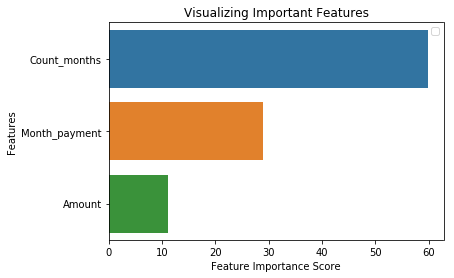

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 18193.407290020175)


In [148]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
# initialize data
features = ['Count_months', 'Amount', 'Month_payment']

#lab_enc = preprocessing.LabelEncoder()
#df_target = df_investors.TotalPays.copy()
#encoded = lab_enc.fit_transform(df_target)

#X_train, X_val, y_train, y_val = train_test_split(df_investors[features], encoded, test_size=0.3)

X_train = train[features]
X_val = test[features]
y_train = train.Payed.copy()
y_val = test.Payed.copy()

model=CatBoostRegressor(iterations=200, depth=5, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train)
preds = model.predict(X_val)
feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#plt.plot(y_val, label = 'actual')
# Plot the predicted values
#plt.plot(preds, label = 'prediction')
#plt.xticks(rotation = '60'); 
#plt.legend()
 
#print("предположительно всего выплатят за март: ", preds, '\n')
print("предположительно всего выплатят за апрель: ", sum(preds))


In [95]:
# пробуем предсказать случайным лесом

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 13594)


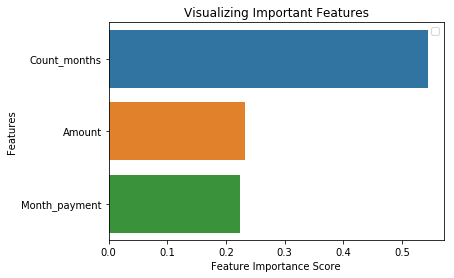

In [141]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
features = ['Count_months', 'Amount', 'Month_payment']

X_train = train[features]
X_val = test[features]
y_train = train.Payed.astype('int64').copy()
y_val = test.Payed.astype('int64').copy()

clf = ensemble.RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

#print("предположительно всего выплатят за март: ", y_pred, '\n')
print("предположительно всего выплатят за апрель: ", sum(y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [79]:
# предскажем логистической регрессией (НЕАДЕКВАТНЫЕ РЕЗУЛЬТАТЫ)

In [142]:
from sklearn.linear_model import LogisticRegression
features = ['Count_months', 'Amount', 'Month_payment']

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

clf = LogisticRegression(random_state=0, C=2.0, penalty='l2').fit(x, y)

print("предположительно всего выплатят за март: ", sum(clf.predict(x_val)))


('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xbc\xd0\xb0\xd1\x80\xd1\x82: ', 14287)


In [98]:
#Предскажем деревом решений

In [149]:
from sklearn.tree import DecisionTreeClassifier

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model = DecisionTreeClassifier()
model.fit(x,y)
proba = model.predict(x_val)

print("предположительно всего выплатят за апрель: ", sum(proba))

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 25910)


In [100]:
# предскажем методом ближайших соседей

In [150]:
from sklearn.neighbors import KNeighborsClassifier

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model_knc = KNeighborsClassifier(n_neighbors = 18)
model_knc.fit(x,y)

proba = model_knc.predict(x_val)
print("предположительно всего выплатят за апрель: ", sum(proba))

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 10569)


In [114]:
#метод опорных векторов

In [145]:
from sklearn import svm

model_svc = svm.SVC()
y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model_svc.probability = True
probas = model_svc.fit(x, y).predict_proba(x_val)

print("предположительно всего выплатят за апрель: ", sum(proba))

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 10569)
